In [1]:
!pip install -U langchain-google-genai

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.2/413.2 kB 1.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install PyPDF2


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 21.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import google.generativeai as genai
from google.colab import userdata
import matplotlib.pyplot as plt
import json
import os
from collections import Counter
from IPython.display import Markdown
from google.genai import types
from langchain_google_genai import ChatGoogleGenerativeAI
from PyPDF2 import PdfReader

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

/home/vscode/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'google.colab'

In [5]:
# Charger les besoins
def lire_besoins(fichier):
    with open(fichier, "r", encoding="utf-8") as f:
        besoins = f.read()
    return besoins

# **Lire le fichier des besoins**

In [6]:
# Afficher le contenu du fichier
def afficher_contenu(besoins):
    print("\nContenu du fichier :\n")
    print(besoins)

fichier_besoins = "besoins.txt"
besoins = lire_besoins(fichier_besoins)
afficher_contenu(besoins)


Contenu du fichier :

je cherche un profil pour développer une application Java avec model MCV
nous avons une équipe calme et dynamique, donc je veux un profil avec des atouts complémentaire
je veux de compétence comme java, Snowflake
il s'agit de l'entreprise safran, elle fait dans l'aéronautique
conseillez moi un niveau d'expérience pour ce besoin.
je veux un profil en cdi
poste situé en France et plus précisément à tarnos
le salaire de base entre 45000-55000
avantage de ticket restaurant, abonnement salle de sport


# **Detection d'informations pertinantes**

In [7]:

# Détecter les informations pertinentes pour la rédaction de l'offre
def detecter_info(besoins):
    model = genai.GenerativeModel("gemini-pro")
    prompt = "Analyse le texte suivant et extrait les informations pertinentes pour rédiger une offre d'emploi :\n" + besoins
    reponse = model.generate_content(prompt)
    info_pertinentes = reponse.text.strip()
    return info_pertinentes
info_pertinentes = detecter_info(besoins)
Markdown(info_pertinentes)

**Informations pertinentes pour l'offre d'emploi :**

**Poste:** Développeur Java

**Description du poste:**

* Développer une application Java avec le modèle MCV
* Compétences requises : Java, Snowflake
* Travailler au sein d'une équipe calme et dynamique

**Entreprise:** Safran (aéronautique)

**Type de contrat:** CDI

**Lieu:** Tarnos, France

**Salaire:** 45 000 - 55 000 € (base)

**Avantages:**

* Tickets restaurant
* Abonnement salle de sport

**Niveau d'expérience recommandé:**

* Le niveau d'expérience souhaité n'est pas spécifié dans le texte. Cependant, compte tenu des compétences techniques requises et de la nature du projet, il est recommandé de rechercher des candidats ayant au moins 2 à 4 ans d'expérience en développement Java.

#**Redaction de l'offre d'emploi**

In [23]:
# Rédaction de l'offre
def rediger_offre(info_pertinentes):
    model = genai.GenerativeModel("gemini-pro")
    prompt = f"À partir des informations suivantes, rédige une offre d'emploi complète et bien structurée :\n{info_pertinentes}"
    reponse = model.generate_content(prompt)
    offre = reponse.text.strip()
    #print(f"\nOffre d'emploi générée :\n{offre}")
    return offre
offre = rediger_offre(info_pertinentes)
Markdown(offre)

**Offre d'Emploi**

**Entreprise:** Safran (Aéronautique)

**Poste:** Développeur Java (CDI)

**Lieu:** Tarnos, France

**Description du Poste:**

Safran recherche un Développeur Java talentueux pour rejoindre son équipe de développement logicielle. Le candidat idéal sera responsable du développement d'une application Java en utilisant le modèle MVC.

**Responsabilités:**

* Concevoir et développer une application Java à l'aide du modèle MVC
* Intégrer l'application à des bases de données Snowflake
* Maintenir et améliorer le codebase existant
* Collaborer avec d'autres membres de l'équipe pour assurer la qualité du logiciel

**Compétences Requises:**

* Maîtrise de Java
* Connaissance approfondie de Snowflake
* Expérience dans le développement d'applications utilisant le modèle MVC
* Excellentes compétences en programmation orientée objet
* Capacité à travailler efficacement au sein d'une équipe
* Solides compétences en résolution de problèmes et en débogage

**Niveau d'expérience recommandé:**

2 à 4 ans d'expérience en développement Java.

**Avantages:**

* Salaire de base : 45 000 - 55 000 €
* Tickets restaurant
* Abonnement salle de sport
* Environnement de travail calme et dynamique
* Opportunités de développement professionnel

**Pour postuler:**

Veuillez envoyer votre CV et une lettre de motivation à **[adresse e-mail]**

# **Importation et affichage du pdf**

In [24]:
def importer_cvs(dossier):
    cvs_contenu = {}
    for fichier in os.listdir(dossier):
        if fichier.endswith(".pdf"):
            chemin_complet = os.path.join(dossier, fichier)
            reader = PdfReader(chemin_complet)
            contenu = ""
            for page in reader.pages:
                contenu += page.extract_text() + "\n"
            cvs_contenu[fichier] = contenu
            print(f"\nContenu du CV ({fichier}) :\n")
            print(contenu)
    return cvs_contenu

dossier_cvs = "CV"
contenus_cvs = importer_cvs(dossier_cvs)


Contenu du CV (Cv_AD.pdf) :

   Port Autonome de Douala
    Stagiaire ingénieur data junior(Avril-Juin 2022 )
       Missions
Contribuer à la réflexion sur la stratégie de la business
intelligence de l’entreprise.
Recueillir et comprendre les besoins métiers. 
Collecter et sélectionner les données internes de
l’entreprise pour l’analyse.
Présenter les données analysées de manières claires et
visuelles.
           Y A N N I C K  S O N E  S O N E
E X P É R I E N C E S  P R O F E S S I O N N E L L E SALTERNANCE DE 24 MOIS EN TANT QUE DATA
ANALYST / BI
E - m a i l
yannickaristide.jlg@gmail.com
M o b i l e
0753708280
A d r e s s e
5 square du pétit éventail
49100 Angers
L a n g u e s
Français: langue maternelle
Anglais: B2
Allemand: A2
P e r m i s
B
C E N T R E S  D ' I N T É R Ê TC O M P É T E N C E S  T E C H N I Q U E S
Lecture
Musique
CyclismeA 1
Diplôme d’ingénieur informatique(en cours)
Esaip école d’ingénieurs (Angers, France)
2023 - 2026
Modules principaux: Mathématiques, Programma

In [25]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
import os

os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")



prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "Output all informations importaant to analyse the profil of each candidats"),
        ("user", "{input}")
    ]
)

response = model.invoke(prompt_template.invoke({"input": contenus_cvs}))

print(response.content)

Okay, here's a breakdown of the key information extracted from each CV, designed to help you analyze the candidates:

**1. Yannick Sone Sone (Cv_AD.pdf)**

*   **Role Sought:** Alternance (Apprenticeship) as Data Analyst / BI (Business Intelligence)
*   **Availability:** September 2024
*   **Education:**
    *   Currently pursuing an Engineering degree in Computer Science at Esaip école d’ingénieurs (Angers, France) (2023-2026)
    *   Bachelor's degree in Technology in Computer Science and Networks from Institut universitaire de technologie (Bandjoun, Cameroon) (2020-2023)
    *   Erasmus stay at Hochschule Hof University of Applied Sciences (Hof, Germany) (March 2024 - July 2024)
*   **Experience:**
    *   Port Autonome de Douala: Junior Data Engineer Intern (April-June 2022)
    *   Intelligensia Corporation: Assistant to the Technical Director (February - May 2023)
    *   ANT (Association du numérique pour tous): Volunteer (November 2023- February 2024)
*   **Skills:**
    *   **

# **Noter le candidat**

In [26]:
def noter_candidat(cv, offre):
    model = genai.GenerativeModel("gemini-pro")
    prompt = f"donne une note sur 10 sur chaque  cv :\n{cv} \n du candidat en fonction de l'offre:\n{offre}"
    reponse = model.generate_content(prompt)
    note = reponse.text.strip()
    #print(f"\nnote d'emploi générée :\n{note}")
    return note
note = noter_candidat(contenus_cvs, offre)
Markdown(note)

**Cv_AD.pdf:** 7/10
* Expérience professionnelle pertinente en tant que data analyst
* Compétences techniques solides
* Bonne présentation

**Cv_Cl22.pdf:** 4/10
* Expérience professionnelle limitée et non pertinente
* Compétences techniques non spécifiées
* Présentation peu professionnelle

**CV Cantona W.pdf:** 8/10
* Expérience professionnelle pertinente en data science
* Compétences techniques avancées
* Présentation professionnelle et claire

In [27]:
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

In [28]:
class Info(BaseModel):
    name: str = Field(description="Nom du candidat")
    note: int = Field(description="Note du CV du candidat en fonction de l'offre")

tagging_prompt = ChatPromptTemplate.from_template(
    """
    Analyse le contenu suivant, extrait le nom du candidat et attribue une note sur 10 en fonction de l'offre suivante :\n
    Offre :\n{offre}\n
    CV :\n{cv}\n
    Ne retourne que les informations définies dans la classe Info.
    """
)

llm = ChatGoogleGenerativeAI(temperature=0, model="gemini-2.0-flash").with_structured_output(Info)

def analyser_cvs(contenus_cvs, offre):
    resultats = []
    for nom_cv, contenu_cv in contenus_cvs.items():
        prompt = tagging_prompt.invoke({"offre": offre, "cv": contenu_cv})
        response = llm.invoke(prompt)

        resultats.append({
            "nom": response.name,
            "note": response.note
        })
    return resultats

resultats_candidats = analyser_cvs(contenus_cvs, offre)
for resultat in resultats_candidats:
    print(f"Nom : {resultat['nom']}, Note : {resultat['note']}")

Nom : Yannick Sone Sone, Note : 6
Nom : Aristide Cash, Note : 2
Nom : Willy Cantona WAFFO TALLA, Note : 7


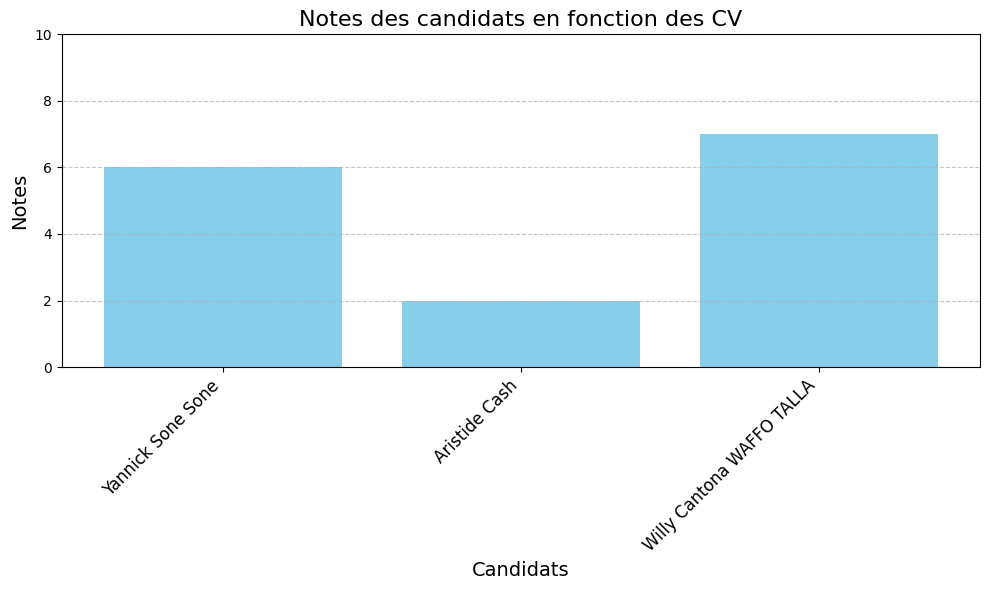

In [29]:
# Fonction pour visualiser les notes des candidats sur un graphe
def visualiser_notes(resultats_candidats):
    noms = [resultat['nom'] for resultat in resultats_candidats]
    notes = [resultat['note'] for resultat in resultats_candidats]

    plt.figure(figsize=(10, 6))
    plt.bar(noms, notes, color="skyblue")
    plt.xlabel("Candidats", fontsize=14)
    plt.ylabel("Notes", fontsize=14)
    plt.title("Notes des candidats en fonction des CV", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.ylim(0, 10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualisation des résultats
visualiser_notes(resultats_candidats)

In [32]:
def formuler_questions(cv, offre):
    model = genai.GenerativeModel("gemini-pro")
    prompt = f"Genere les questions d'entretiens du cv :\n{cv} \n en fonction de l'offre:\n{offre}"
    reponse = model.generate_content(prompt)
    questions = reponse.text.strip()
    #print(f"\nnote d'emploi générée :\n{note}")
    return questions
questions = formuler_questions(contenus_cvs, offre)
Markdown(questions)

**Questions d'entretien liées au CV**

**CV : Cv_AD.pdf**

* **Questions techniques:**
    * Pouvez-vous nous parler de votre expérience dans la collecte et le traitement de données ?
    * Quels outils et techniques avez-vous utilisés pour analyser les données ?
    * Quels types de visualisations et de rapports de données avez-vous créés ?
* **Questions comportementales:**
    * Racontez-nous un moment où vous avez dû collecter et analyser des données dans un délai serré.
    * Décrivez une fois où vous avez utilisé vos compétences en communication pour présenter efficacement des données à des parties prenantes non techniques.

**CV : Cv_Cl22.pdf**

* **Questions techniques:**
    * Décrivez vos tâches quotidiennes en tant qu'agent d'entretien.
    * Quels produits de nettoyage et équipements utilisez-vous régulièrement ?
    * Quelles sont vos méthodes pour maintenir des normes élevées d'hygiène et de propreté ?
* **Questions comportementales:**
    * Donnez-nous un exemple de fois où vous avez dépassé les attentes dans votre travail en tant qu'agent d'entretien.
    * Comment gérez-vous les situations où vous devez travailler avec un nombre limité de ressources ?

**CV : CV Cantona W.pdf**

* **Questions techniques:**
    * Pouvez-vous nous expliquer votre compréhension des algorithmes de Machine Learning et Deep Learning ?
    * Quels logiciels et outils avez-vous utilisés pour la collecte, le nettoyage et le traitement des données ?
    * Comment avez-vous automatisé et rationalisé le traitement des données ?
* **Questions comportementales:**
    * Décrivez un projet dans lequel vous avez appliqué avec succès des techniques de Machine Learning pour résoudre un problème commercial.
    * Racontez-nous un moment où vous avez dû travailler de manière autonome pour résoudre un défi technologique complexe.